In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df=pd.read_csv(r"C:\Users\DELL\Downloads\archive(3)\data.csv")

In [3]:
df1=df
df1.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df1.drop(["date","country"],axis=1,inplace=True)
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [5]:
df1.groupby('city')['city'].agg('count')

city
Algona                    5
Auburn                  176
Beaux Arts Village        1
Bellevue                286
Black Diamond             9
Bothell                  33
Burien                   74
Carnation                22
Clyde Hill               11
Covington                43
Des Moines               58
Duvall                   42
Enumclaw                 28
Fall City                11
Federal Way             148
Inglewood-Finn Hill       1
Issaquah                187
Kenmore                  66
Kent                    185
Kirkland                187
Lake Forest Park         36
Maple Valley             96
Medina                   11
Mercer Island            86
Milton                    2
Newcastle                33
Normandy Park            18
North Bend               50
Pacific                   6
Preston                   2
Ravensdale                7
Redmond                 235
Renton                  293
Sammamish               175
SeaTac                   29
Seattle        

In [6]:
df1.isnull().values.any()

False

In [7]:
df1.groupby('statezip')['statezip'].agg('count')

statezip
WA 98001    67
WA 98002    36
WA 98003    48
WA 98004    74
WA 98005    29
            ..
WA 98188    23
WA 98198    56
WA 98199    68
WA 98288     3
WA 98354     2
Name: statezip, Length: 77, dtype: int64

In [8]:
df1.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052


In [9]:
lab_enc=LabelEncoder()

In [10]:
df2=df1
lab_enc.fit(df2['city'])

LabelEncoder()

In [11]:
df2['enc_city']=lab_enc.transform(df2['city'])

In [12]:
df2.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,enc_city
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,36
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,35


In [13]:
df3=df2
df3.drop(['city','statezip','street'],axis=1,inplace=True)
df3.head(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,enc_city
0,313000.0,3.0,1.5,1340,7912,1.5,0,0,3,1340,0,1955,2005,36
1,2384000.0,5.0,2.5,3650,9050,2.0,0,4,5,3370,280,1921,0,35


<Axes: >

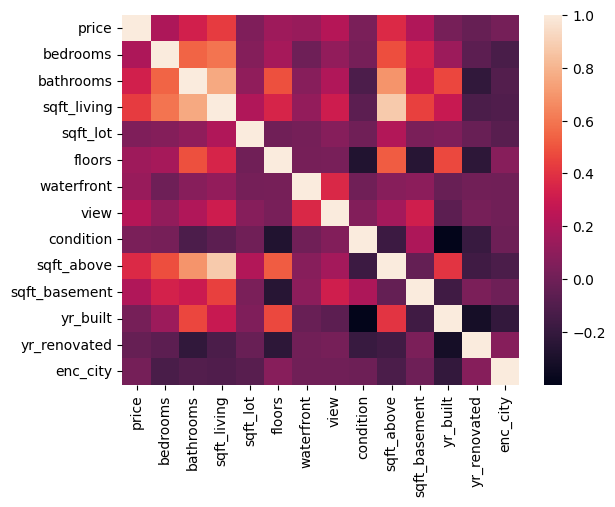

In [15]:
# plt.imshow(df3.corr())
# plt.xsticks
sns.heatmap(df3.corr())

In [16]:
Y=np.array(df3['price'])
df3.drop(['price'],axis=1,inplace =True)

In [17]:
X=np.array(df3)
x=(X-np.mean(X))/np.std(X)

In [18]:
x.shape

(4600, 13)

In [19]:
y=(Y-np.mean(Y))/np.std(Y)

In [20]:
l_reg=LinearRegression()

In [21]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state = 42)

In [22]:
l_reg.fit(x_train,y_train)

LinearRegression()

In [23]:
y_predict=l_reg.predict(x_test)

In [24]:
y_predict

array([-0.42848659, -0.37890482,  0.91571212, ..., -0.49666333,
        0.18874478, -0.07011795])

In [25]:
y_test

array([-0.01412445, -0.97905112,  2.05851675, ...,  0.09762257,
       -0.22520216, -0.15256659])

In [26]:
reg_model_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_predict})
reg_model_diff

,Actual value,Predicted value
0,-0.014124,-0.428487
1,-0.979051,-0.378905
2,2.058517,0.915712
3,-0.331628,0.023807
4,-0.491266,-0.343047
...,...,...
1145,4.342236,2.416634
1146,-0.349366,-0.035700
1147,0.097623,-0.496663
1148,-0.225202,0.188745


In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

### MSE and MAE Score

In [28]:
mse = mean_squared_error(y_test, y_predict)
mae = mean_absolute_error(y_test, y_predict)
print(mse)
print(mae)

2.52941827387778
0.3574950779699996


In [29]:
l_reg.coef_

array([-1.27340294e+03,  6.63182338e+02, -1.00140599e+10, -8.84156744e-03,
        1.13821926e+03,  7.16381537e+03,  8.22608782e+02,  6.08849391e+02,
        1.00140599e+10,  1.00140599e+10, -4.73395985e+01,  1.04928121e-01,
        2.56328733e+01])

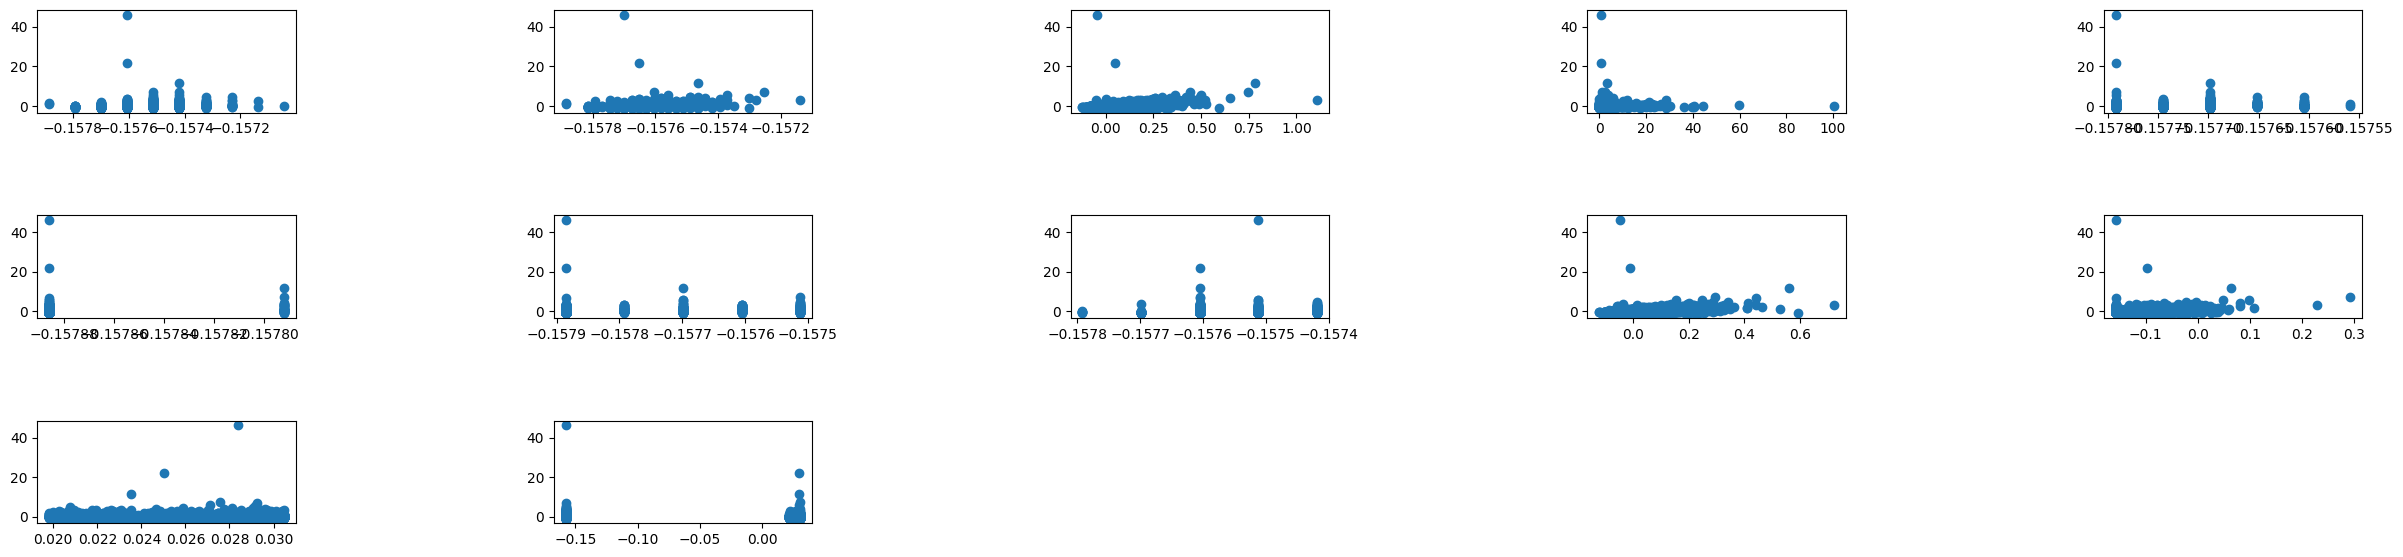

In [30]:
for i in range(1,x.shape[1]):
    plt.subplot(5,5,i)
    plt.scatter(x[:,i-1],y)
plt.subplots_adjust(wspace=1,hspace=1)
# fig=plt.figure()
# fig.set_figheight(300)
# fig.set_figwidth(300)
plt.gcf().set_size_inches(30,12)
plt.show()